In [19]:
# impirt libraries
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as lr

from sklearn.model_selection import train_test_split as tts



In [20]:
# read data 
dt=pd.read_csv('C:/Users/SOFT/Desktop/expert_system_project/archive/kc_house_data.csv')
dt.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

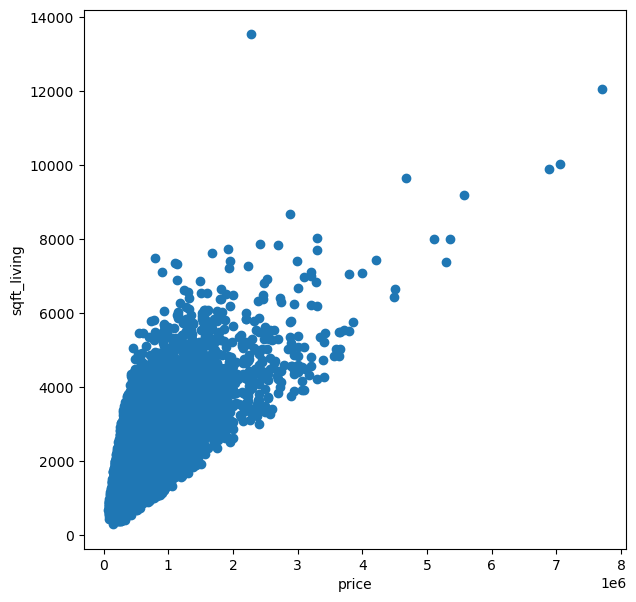

In [22]:
# shown relation between sqft_living & price
plt.figure(figsize=(7, 7))
plt.scatter(x=dt['price'],y=dt['sqft_living'])
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.show()

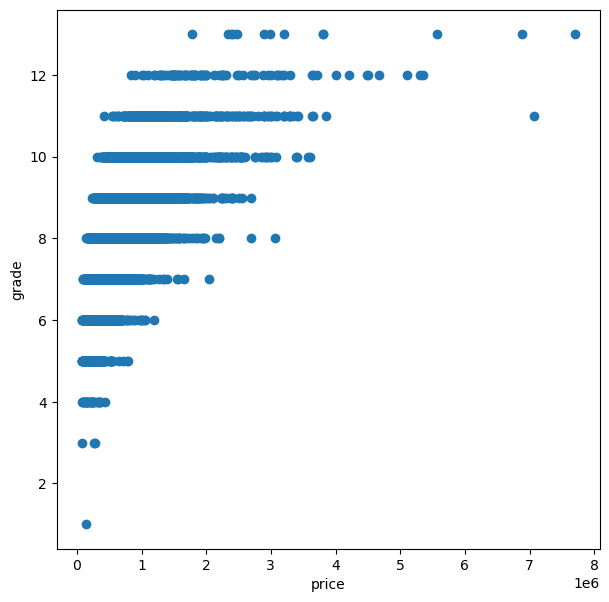

In [23]:
# shown relation between grade & price
plt.figure(figsize=(7, 7))
plt.scatter(x=dt['price'],y=dt['grade'])
plt.xlabel('price')
plt.ylabel('grade')
plt.show()

In [24]:
dt.shape

(21613, 21)

In [25]:
dt.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [26]:
#features are (taken import features that affect on the price)
fet=[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long']
x_fet=dt[fet]
y_tar=dt['price']

In [27]:
# divide data into test(.3) and train(.7)
X_train, X_test, Y_train, Y_test = tts(x_fet, y_tar, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(15129, 15)
(6484, 15)
(15129,)
(6484,)


In [28]:
#training the model by using LinearRegression

clf=lr()
clf.fit(X_train,Y_train)
# accuray of model
accuracy=clf.score(X_test,Y_test)

"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 70%'

'Accuracy: 70%'

In [29]:
#using Ridge classifier
from sklearn.linear_model import Ridge as rd

clf1=rd(alpha=0.0001)
clf1.fit(X_train,Y_train)
# print accuracy
accuracy1=clf1.score(X_test,Y_test)
"Accuracy1: {}%".format(int(round(accuracy * 100)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.1133e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


'Accuracy1: 70%'

In [36]:
#using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
clf3=RandomForestRegressor()
clf3.fit(X_train,Y_train)
accuracy3=clf3.score(X_test,Y_test)
print ("RandomForestRegressor: {}%".format(int(round(accuracy3*100))))

RandomForestRegressor: 88%


In [37]:
#using GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
clf4=GradientBoostingRegressor()
clf4.fit(X_train,Y_train)
accuracy4=clf4.score(X_test,Y_test)
print ("RandomForestRegressor: {}%".format(int(round(accuracy4*100))))

RandomForestRegressor: 86%
